<a href="https://colab.research.google.com/github/siddugarlapati/loan_pridection_ml/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing packages

In [ ]:
#importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean,median,mode

#Reading the dataset

In [ ]:
#importing the dataset
df=pd.read_csv(r'https://raw.githubusercontent.com/hasritha17/Loan-approval-prediction/master/loan-prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#Extracting information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Checking if there are any missing values in the dataset

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Getting the unique values of each feature

In [ ]:
columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
unique_values = {col: df[col].unique() for col in columns}
unique_values

{'Gender': array(['Male', 'Female', nan], dtype=object),
 'Married': array(['No', 'Yes', nan], dtype=object),
 'Dependents': array(['0', '1', '2', '3+', nan], dtype=object),
 'Self_Employed': array(['No', 'Yes', nan], dtype=object),
 'LoanAmount': array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
        109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
        116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
        144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
        135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
        113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
         25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
         85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
        129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
        101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
         90.,

#Box plot for LoanAmount feature

<Axes: >

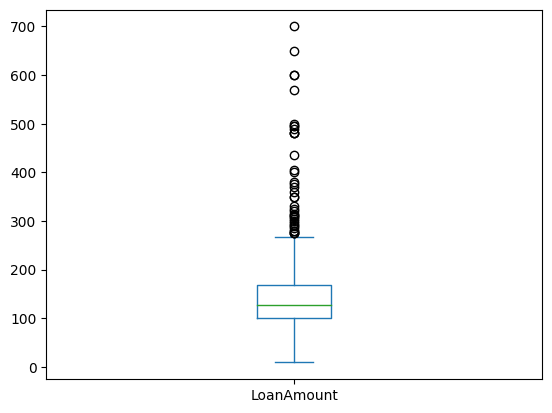

In [ ]:
df['LoanAmount'].plot(kind='box')

#Replacing all the missing values of Gender, Married, Dependents, Self_Employed, Loan_Amount_Term and Credit_History features

In [ ]:
df['Gender'].fillna(mode(df['Gender']),inplace=True) #imputing the nan values with mode of Gender column
df['Married'].fillna(mode(df['Married']),inplace=True) #imputing the nan values with mode of Married column
df['Dependents'].fillna(mode(df['Dependents']),inplace=True) #imputing the nan values with mode of Dependents column
df['Self_Employed'].fillna(mode(df['Self_Employed']),inplace=True) #imputing the nan values with mode of Self_Employed column
df['LoanAmount'].fillna(0,inplace=True) #replacing the nan values with 0
df['Loan_Amount_Term'].fillna(mode(df['Loan_Amount_Term']),inplace=True) #imputing the nan values with mode of Loan_Amount_Term column
df['Credit_History'].fillna(mode(df['Credit_History']),inplace=True) #imputing the nan values with mode of Credit_History
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#Checking whether all the missing values are imputed or not

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Getting the information about the dataset and each feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Understanding the distribution of various columns against Loan Status

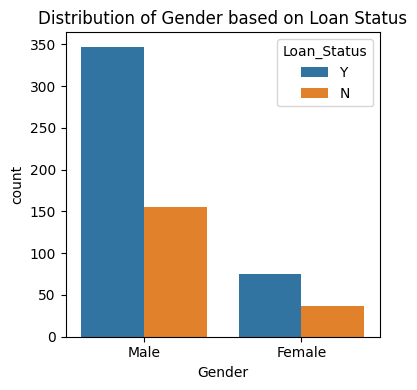

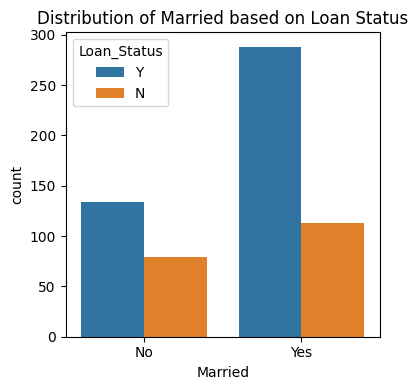

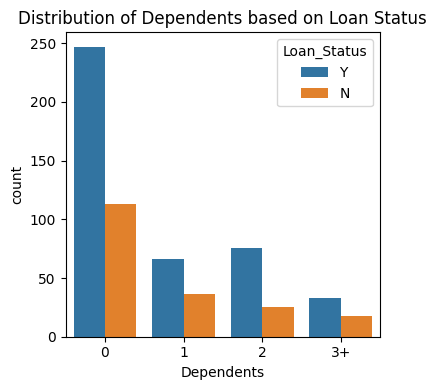

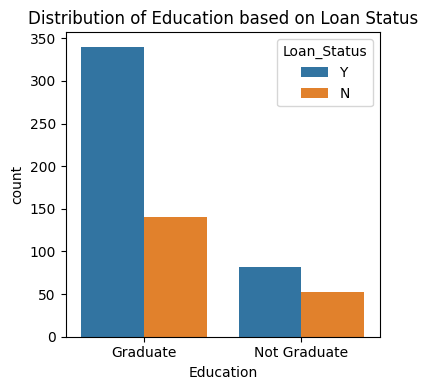

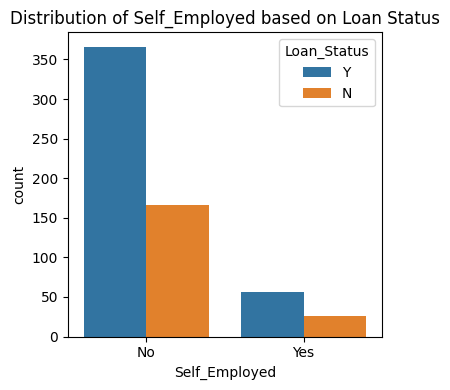

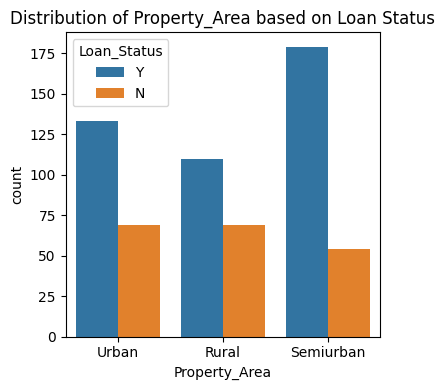

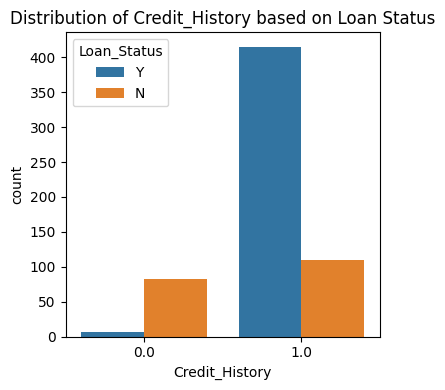

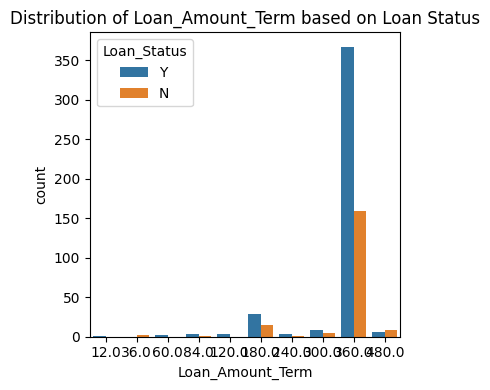

In [ ]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                    'Property_Area','Credit_History','Loan_Amount_Term']

for col in categorical_cols:
    plt.figure(figsize=(4,4))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f'Distribution of {col} based on Loan Status')
    plt.tight_layout()
    plt.show()


#Encoding

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = df['Dependents'].astype('int64')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'].astype(str))
df['Married'] = le.fit_transform(df['Married'].astype(str))
df['Education'] = le.fit_transform(df['Education'].astype(str))
df['Self_Employed'] = le.fit_transform(df['Self_Employed'].astype(str))
df['Loan_Amount_Term'] = le.fit_transform(df['Loan_Amount_Term'].astype(str))
df['Loan_Status'] = le.fit_transform(df['Loan_Status'].astype(str))

df['Gender'] = df['Gender'].astype('int64')
df['Married'] = df['Married'].astype('int64')
df['Education'] = df['Education'].astype('int64')
df['Self_Employed'] = df['Self_Employed'].astype('int64')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int64')
df['Loan_Status'] = df['Loan_Status'].astype('int64')

In [ ]:
df = pd.get_dummies(df, columns=['Property_Area'])

df['Property_Area_Urban'] = df['Property_Area_Urban'].astype('int64')
df['Property_Area_Semiurban'] = df['Property_Area_Semiurban'].astype('int64')
df['Property_Area_Rural'] = df['Property_Area_Rural'].astype('int64')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,0.0,6,1.0,1,0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,6,1.0,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,6,1.0,1,0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,6,1.0,1,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,6,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,6,1.0,1,1,0,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,2,1.0,1,1,0,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,6,1.0,1,0,0,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,6,1.0,1,0,0,1


#Deleting unnecessary features

In [ ]:
del df['Loan_ID']

In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
del df['ApplicantIncome']
del df['CoapplicantIncome']

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1,0,0,0,0,0.0,6,1.0,1,0,0,1,5849.0
1,1,1,1,0,0,128.0,6,1.0,0,1,0,0,6091.0
2,1,1,0,0,1,66.0,6,1.0,1,0,0,1,3000.0
3,1,1,0,1,0,120.0,6,1.0,1,0,0,1,4941.0
4,1,0,0,0,0,141.0,6,1.0,1,0,0,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,6,1.0,1,1,0,0,2900.0
610,1,1,3,0,0,40.0,2,1.0,1,1,0,0,4106.0
611,1,1,1,0,0,253.0,6,1.0,1,0,0,1,8312.0
612,1,1,2,0,0,187.0,6,1.0,1,0,0,1,7583.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   LoanAmount               614 non-null    float64
 6   Loan_Amount_Term         614 non-null    int64  
 7   Credit_History           614 non-null    float64
 8   Loan_Status              614 non-null    int64  
 9   Property_Area_Rural      614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    int64  
 11  Property_Area_Urban      614 non-null    int64  
 12  TotalIncome              614 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 62.5 KB


#Retrieving Statistical information

In [ ]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,141.166124,5.664495,0.855049,0.687296,0.291531,0.379479,0.328990,7024.705081
std,0.386497,0.476373,1.009623,0.413389,0.340446,88.340630,1.208241,0.352339,0.463973,0.454838,0.485653,0.470229,6458.663872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,98.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4166.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,125.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5416.500000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7521.750000
max,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000


#Understanding the distribution of Loan Amount

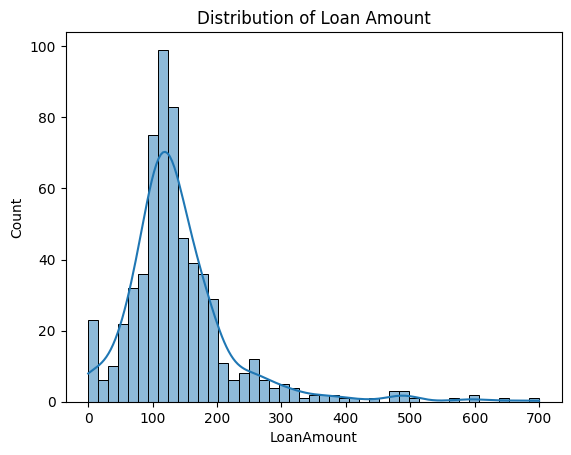

In [ ]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

#Understanding the distribution of Total Income

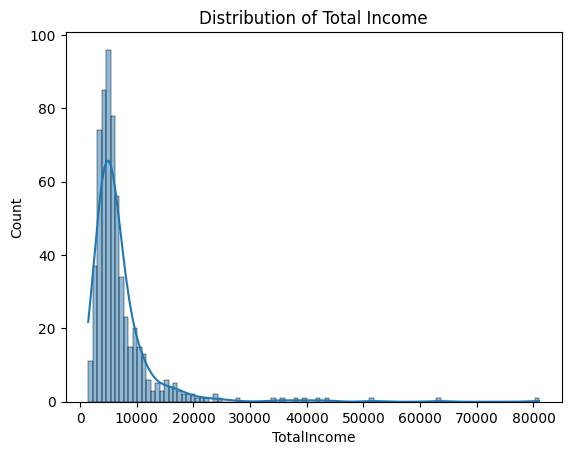

In [ ]:
sns.histplot(df['TotalIncome'], kde=True)
plt.title('Distribution of Total Income')
plt.show()

#Finding the correlation among the features

In [ ]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.095586,-0.092841,0.009170,0.017987,0.080283,-0.108623,0.034530,0.093191
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.136388,-0.097675,0.010938,0.091478,-0.006805,0.005845,0.000546,0.083319
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.156164,-0.071778,-0.040160,0.010118,-0.000816,0.001924,-0.001198,0.125590
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.173244,-0.091589,-0.073658,-0.085884,0.077520,-0.039410,-0.034279,-0.161362
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.109154,-0.001938,-0.001550,-0.003700,0.022065,0.008710,-0.030338,0.113000
LoanAmount,0.095586,0.136388,0.156164,-0.173244,0.109154,1.000000,0.024534,0.004863,-0.010631,0.043534,0.010772,-0.053234,0.595406
Loan_Amount_Term,-0.092841,-0.097675,-0.071778,-0.091589,-0.001938,0.024534,1.000000,0.046521,-0.004123,0.047660,0.050522,-0.098278,-0.102176
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.004863,0.046521,1.000000,0.540556,-0.020906,0.035976,-0.016934,-0.012563
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,-0.010631,-0.004123,0.540556,1.000000,-0.100694,0.136540,-0.043621,-0.031271
Property_Area_Rural,0.080283,-0.006805,-0.000816,0.077520,0.022065,0.043534,0.047660,-0.020906,-0.100694,1.000000,-0.501646,-0.449168,0.017387


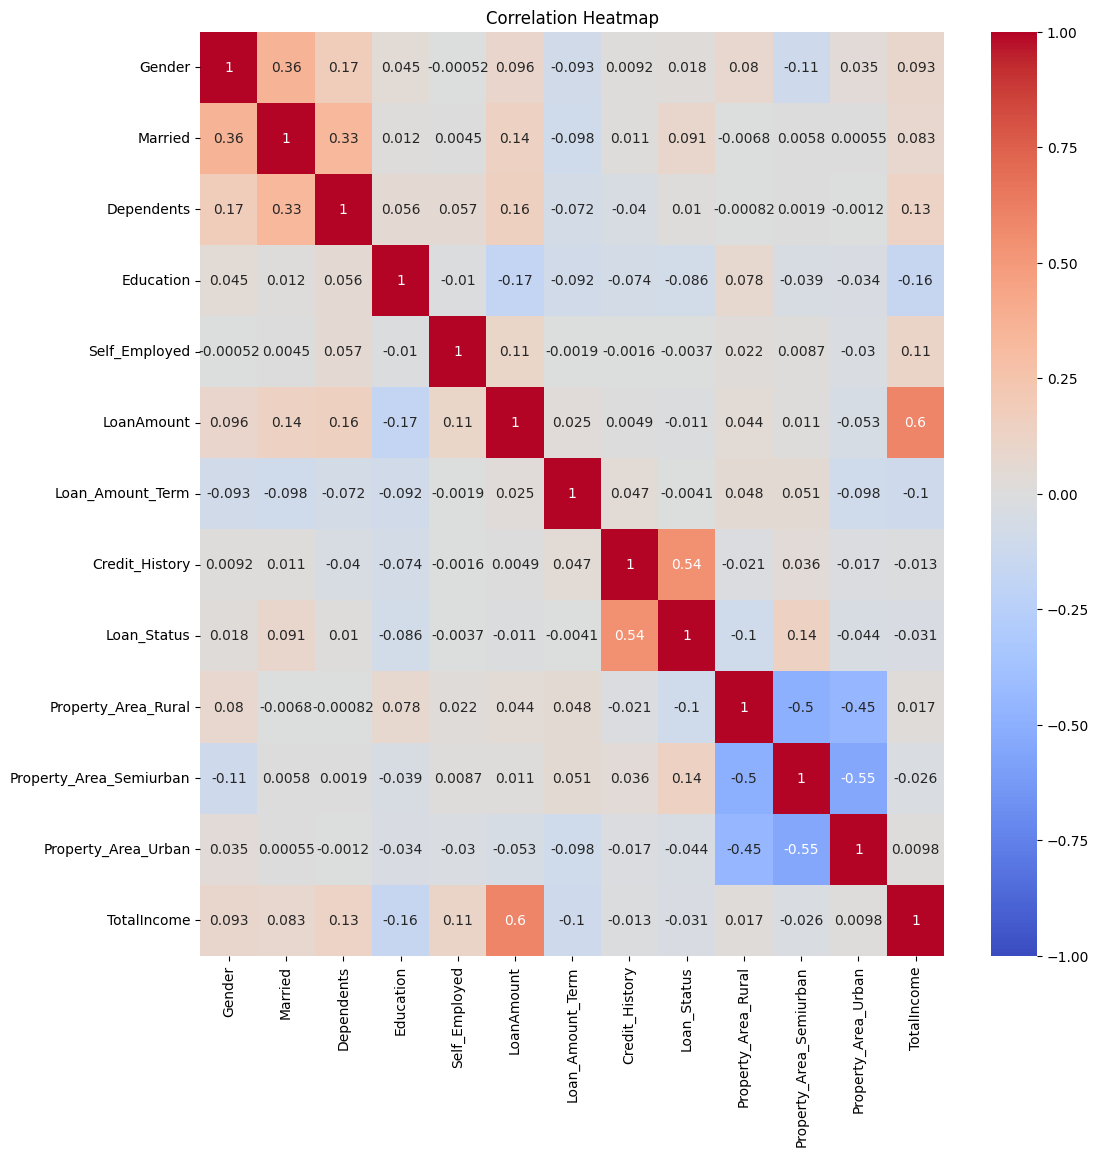

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#PAIRPLOT

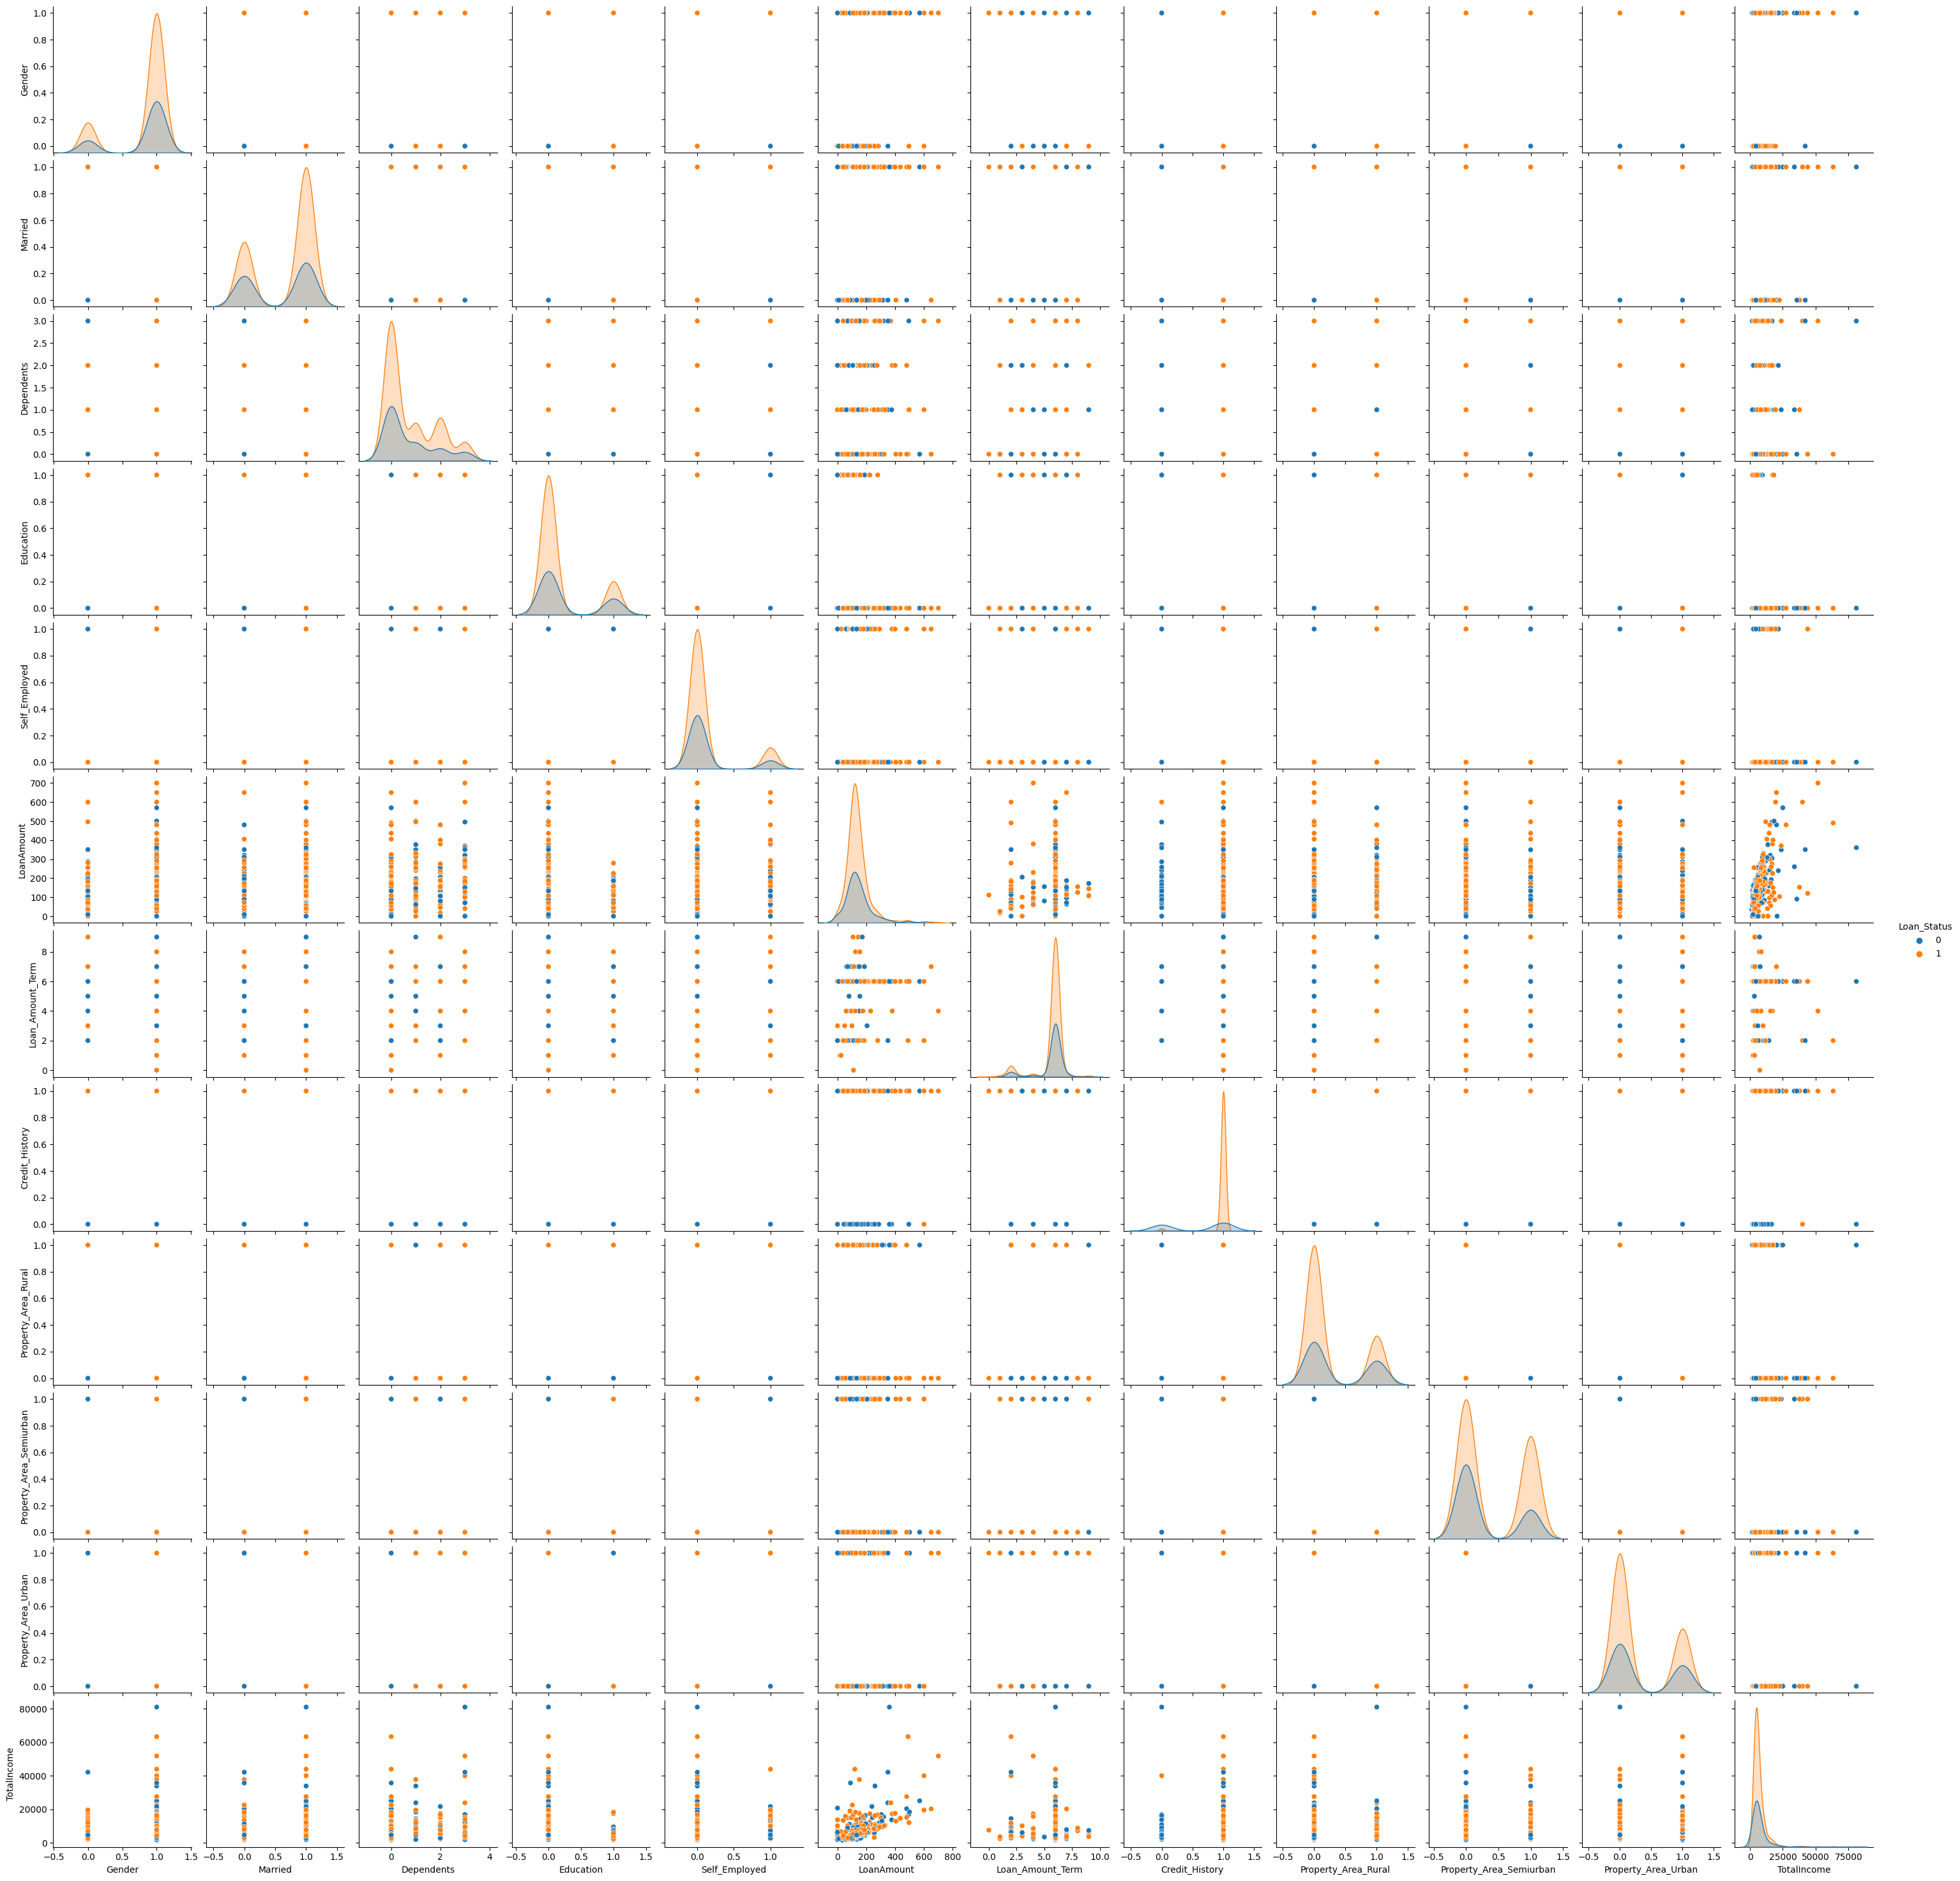

In [ ]:
sns.pairplot(df, hue= 'Loan_Status')

#Dividing the dataset into dependent and independent features

In [ ]:
X = df.loc[:,df.columns != 'Loan_Status']
y = df.loc[:,'Loan_Status']

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,1,0,0,0,0,0.0,6,1.0,0,0,1,5849.0
1,1,1,1,0,0,128.0,6,1.0,1,0,0,6091.0
2,1,1,0,0,1,66.0,6,1.0,0,0,1,3000.0
3,1,1,0,1,0,120.0,6,1.0,0,0,1,4941.0
4,1,0,0,0,0,141.0,6,1.0,0,0,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,6,1.0,1,0,0,2900.0
610,1,1,3,0,0,40.0,2,1.0,1,0,0,4106.0
611,1,1,1,0,0,253.0,6,1.0,0,0,1,8312.0
612,1,1,2,0,0,187.0,6,1.0,0,0,1,7583.0


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

#Splitting the dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((429, 12), (185, 12), (429,), (185,))

#Standardising the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 0.46770717,  0.71081865,  1.14395772, ...,  1.25870463,
        -0.68129569, -0.38482186],
       [ 0.46770717,  0.71081865, -0.77306518, ..., -0.79446756,
         1.46779146, -0.39313129],
       [-2.13808994, -1.40682858,  0.18544627, ...,  1.25870463,
        -0.68129569, -0.49198484],
       ...,
       [-2.13808994, -1.40682858, -0.77306518, ..., -0.79446756,
         1.46779146, -0.41017994],
       [ 0.46770717,  0.71081865,  2.10246917, ...,  1.25870463,
        -0.68129569,  0.43738184],
       [-2.13808994,  0.71081865,  0.18544627, ..., -0.79446756,
         1.46779146, -0.3467131 ]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[ 0.46770717,  0.71081865, -0.77306518, ...,  1.25870463,
        -0.68129569, -0.11591154],
       [ 0.46770717,  0.71081865, -0.77306518, ..., -0.79446756,
         1.46779146, -0.07436439],
       [ 0.46770717,  0.71081865, -0.77306518, ..., -0.79446756,
        -0.68129569,  1.94568652],
       ...,
       [-2.13808994, -1.40682858, -0.77306518, ..., -0.79446756,
         1.46779146, -0.4044493 ],
       [ 0.46770717,  0.71081865,  0.18544627, ..., -0.79446756,
        -0.68129569,  1.07405604],
       [ 0.46770717,  0.71081865, -0.77306518, ..., -0.79446756,
        -0.68129569,  0.1276407 ]])

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.49      0.64        69
           1       0.76      0.97      0.86       116

    accuracy                           0.79       185
   macro avg       0.84      0.73      0.75       185
weighted avg       0.82      0.79      0.78       185



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score, f1_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_lr))
print("Accuracy: ",accuracy_score(y_test, y_pred_lr))
print("Precision: ",precision_score(y_test, y_pred_lr, average = None))
print("Recall: ",recall_score(y_test, y_pred_lr, average = None))
print("F1-score: ",f1_score(y_test, y_pred_lr, average = None))

Confusion Matrix: 
 [[ 34  35]
 [  3 113]]
Accuracy:  0.7945945945945946
Precision:  [0.91891892 0.76351351]
Recall:  [0.49275362 0.97413793]
F1-score:  [0.64150943 0.85606061]


#Hyper Parameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
best_params

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None,
              min_samples_split=5, min_samples_leaf=4)
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        69
           1       0.77      0.97      0.85       116

    accuracy                           0.79       185
   macro avg       0.83      0.74      0.75       185
weighted avg       0.82      0.79      0.78       185



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score,precision_score, accuracy_score, f1_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_rf))
print("Accuracy: ",accuracy_score(y_test, y_pred_rf))
print("Precision: ",precision_score(y_test, y_pred_rf, average = None))
print("Recall: ",recall_score(y_test, y_pred_rf, average = None))
print("F1-score: ",f1_score(y_test, y_pred_rf, average = None))

Confusion Matrix: 
 [[ 35  34]
 [  4 112]]
Accuracy:  0.7945945945945946
Precision:  [0.8974359  0.76712329]
Recall:  [0.50724638 0.96551724]
F1-score:  [0.64814815 0.85496183]


#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54        69
           1       0.73      0.73      0.73       116

    accuracy                           0.66       185
   macro avg       0.64      0.63      0.63       185
weighted avg       0.66      0.66      0.66       185



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_dt))
print("Accuracy: ",accuracy_score(y_test, y_pred_dt))
print("Precision: ",precision_score(y_test, y_pred_dt, average = None))
print("Recall: ",recall_score(y_test, y_pred_dt, average = None))
print("F1-score: ",f1_score(y_test, y_pred_dt, average = None))

Confusion Matrix: 
 [[37 32]
 [31 85]]
Accuracy:  0.6594594594594595
Precision:  [0.54411765 0.72649573]
Recall:  [0.53623188 0.73275862]
F1-score:  [0.54014599 0.72961373]


#KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.49      0.63        69
           1       0.76      0.96      0.85       116

    accuracy                           0.78       185
   macro avg       0.82      0.72      0.74       185
weighted avg       0.80      0.78      0.77       185



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score, f1_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ",accuracy_score(y_test, y_pred_knn))
print("Precision: ",precision_score(y_test, y_pred_knn, average = None))
print("Recall: ",recall_score(y_test, y_pred_knn, average = None))
print("F1-score: ",f1_score(y_test, y_pred_knn, average = None))

Confusion Matrix: 
 [[ 34  35]
 [  5 111]]
Accuracy:  0.7837837837837838
Precision:  [0.87179487 0.76027397]
Recall:  [0.49275362 0.95689655]
F1-score:  [0.62962963 0.84732824]


#Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        69
           1       0.77      0.97      0.85       116

    accuracy                           0.79       185
   macro avg       0.83      0.74      0.75       185
weighted avg       0.82      0.79      0.78       185



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score, f1_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_nb))
print("Accuracy: ",accuracy_score(y_test, y_pred_nb))
print("Precision: ",precision_score(y_test, y_pred_nb, average = None))
print("Recall: ",recall_score(y_test, y_pred_nb, average = None))
print("F1-score: ",f1_score(y_test, y_pred_nb, average = None))

Confusion Matrix: 
 [[ 35  34]
 [  4 112]]
Accuracy:  0.7945945945945946
Precision:  [0.8974359  0.76712329]
Recall:  [0.50724638 0.96551724]
F1-score:  [0.64814815 0.85496183]


#Support Vector Classifier

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.49      0.64        69
           1       0.76      0.97      0.86       116

    accuracy                           0.79       185
   macro avg       0.84      0.73      0.75       185
weighted avg       0.82      0.79      0.78       185



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score, f1_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_svm))
print("Accuracy: ",accuracy_score(y_test, y_pred_svm))
print("Precision: ",precision_score(y_test, y_pred_svm, average = None))
print("Recall: ",recall_score(y_test, y_pred_svm, average = None))
print("F1-score: ",f1_score(y_test, y_pred_svm, average = None))

Confusion Matrix: 
 [[ 34  35]
 [  3 113]]
Accuracy:  0.7945945945945946
Precision:  [0.91891892 0.76351351]
Recall:  [0.49275362 0.97413793]
F1-score:  [0.64150943 0.85606061]


#Ada Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_clf = AdaBoostClassifier(n_estimators=100,random_state=1)
Ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [ ]:
y_pred_ada = Ada_clf.predict(X_test)
y_pred_ada

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.77      0.52      0.62        69
           1       0.76      0.91      0.83       116

    accuracy                           0.76       185
   macro avg       0.76      0.71      0.72       185
weighted avg       0.76      0.76      0.75       185



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score,accuracy_score, f1_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_ada))
print("Accuracy: ",accuracy_score(y_test, y_pred_ada))
print("Precision: ",precision_score(y_test, y_pred_ada, average = None))
print("Recall: ",recall_score(y_test, y_pred_ada, average = None))
print("F1-score: ",f1_score(y_test, y_pred_ada, average = None))

Confusion Matrix: 
 [[ 36  33]
 [ 11 105]]
Accuracy:  0.7621621621621621
Precision:  [0.76595745 0.76086957]
Recall:  [0.52173913 0.90517241]
F1-score:  [0.62068966 0.82677165]


#Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
y_pred_gb = gb.predict(X_test)
y_pred_gb

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.73      0.55      0.63        69
           1       0.77      0.88      0.82       116

    accuracy                           0.76       185
   macro avg       0.75      0.72      0.72       185
weighted avg       0.75      0.76      0.75       185



In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred_gb))
print("Accuracy: ",accuracy_score(y_test, y_pred_gb))
print("Precision: ",precision_score(y_test, y_pred_gb, average = None))
print("Recall: ",recall_score(y_test, y_pred_gb, average = None))
print("F1-score: ",f1_score(y_test, y_pred_gb, average = None))

Confusion Matrix: 
 [[ 38  31]
 [ 14 102]]
Accuracy:  0.7567567567567568
Precision:  [0.73076923 0.76691729]
Recall:  [0.55072464 0.87931034]
F1-score:  [0.62809917 0.81927711]


#Cross Validation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Assuming you have X and y defined somewhere before this
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

i = 1
mean = 0
kf = StratifiedKFold(n_splits=5)

for train_index, test_index in kf.split(X_scaled, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X_scaled[train_index], X_scaled[test_index]
    ytr, yvl = y[train_index], y[test_index]

    model = LogisticRegression(max_iter=1000, random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)

    score = accuracy_score(yvl, pred_test)
    mean += score
    print('accuracy_score', score)

    i += 1
    # If you have a 'test' dataset, uncomment the next line
    # pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]

print('\n Mean Validation Accuracy', mean / (i-1))



1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.7723577235772358

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8536585365853658

5 of kfold 5
accuracy_score 0.819672131147541

 Mean Validation Accuracy 0.8078368652538984
